<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [2]:
cell_phones.head(2)

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0


In [3]:
population.head(2)

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000


In [5]:
geo_country_codes.head(2)

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america


In [9]:
population.index.values

array([    0,     1,     2, ..., 59294, 59295, 59296])

In [10]:
cell_phones.shape, population.shape, geo_country_codes.shape

((9215, 3), (59297, 3), (273, 33))

In [0]:
# So it would appear 'time' just means year. I am curious why they have data
# for the 1960s
cell_phones['time'].value_counts()

## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
# Inner merge of cell_phones and population on geo and time(year):

cell_ppl_merged = pd.merge(cell_phones, population, 
                           on=['geo', 'time'], 
                           how='inner')

In [15]:
cell_ppl_merged.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
# Left merge of previous merge and geo_country_codes with geo codes as key

cpg_merged = cell_ppl_merged.merge(geo_country_codes[['geo', 'country']], 
                                   how='left', 
                                   on='geo')

In [33]:
cpg_merged.shape

(8590, 5)

In [0]:
# Check that everything looks ok

cpg_merged.sample(30)

In [0]:
# Check by year

cpg_merged.loc[cpg_merged['time'] == 2004].sample(30)

In [38]:
# Scan for nan
cpg_merged.isna().sum()

geo                  0
time                 0
cell_phones_total    0
population_total     0
country              0
dtype: int64

## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [40]:
# Just to make sure of spelling etc.
cpg_merged.columns.tolist()

['geo', 'time', 'cell_phones_total', 'population_total', 'country']

In [0]:
# Made a function. Didn't use it.
def cells_pp(cells, population):
  cf = float(cells)
  pf = float(population)
  return(cf/pf)

# Make column that is total cell phones divided by population

cpg_merged['cell_phones_per_person'] = (cpg_merged['cell_phones_total'] / 
                                        cpg_merged['population_total'])

In [45]:
cpg_merged.shape

(8590, 6)

In [0]:
# Check Italy, see if results make sense.
# **I will be closing output to keep this notebook from getting too long**

cpg_merged.loc[cpg_merged['geo'] == 'ita']

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
# Convert geo column to upper case
cpg_merged['geo'] = cpg_merged['geo'].str.upper()

In [0]:
# Check italy again
cpg_merged.loc[cpg_merged['geo'] == 'ITA']

## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [55]:
cpg_merged.describe(include='number')

,time,cell_phones_total,population_total,cell_phones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [56]:
cpg_merged.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,MWI,Guyana
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [73]:
cond_2017 = (cpg_merged['time'] == 2017)
sort_col = 'cell_phones_total'
show_col = ['country', 'cell_phones_total']

(cpg_merged.loc[cond_2017]
           .sort_values(
               sort_col, 
               ascending=False))[show_col].head(5)

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [92]:
# Create subset with only geo code 'USA'
cpg_usa = (cpg_merged
           .loc[cpg_merged['geo'] == 'USA']
           .sort_values('time', ascending=False))

# Condition for locating data where there are more total phones that population
more_phones = (cpg_usa['cell_phones_total'] > cpg_usa['population_total'])

# this indexes the minimum year value with geo code 'USA'
# where there are more cell phones than people

cpg_usa.loc[cpg_usa.loc[more_phones]['time'].idxmin()]

geo                                    USA
time                                  2014
cell_phones_total            355,500,000.0
population_total                 317718779
country                      United States
cell_phones_per_person   1.118914031833164
Name: 8131, dtype: object

time: 2014

## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
cond_0717 = (cpg_merged['time'] >= 2007)

cond_geo = ((cpg_merged['geo'] == 'CHN') | 
                           (cpg_merged['geo'] == 'IND') |
                           (cpg_merged['geo'] == 'IDN') |
                           (cpg_merged['geo'] == 'USA') |
                           (cpg_merged['geo'] == 'BRA'))

cpg_0717 = cpg_merged.loc[cond_0717 & cond_geo]

pt_cpg_0717 = cpg_0717.pivot_table(columns='time', 
                                   index='country', 
                                   values='cell_phones_total')

In [112]:
pt_cpg_0717.shape

(5, 11)

In [114]:
pt_cpg_0717

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


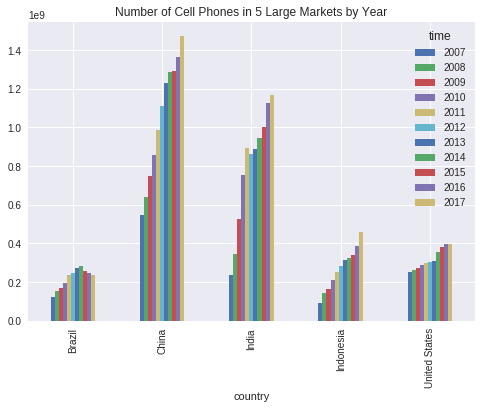

In [118]:
pt_cpg_0717.plot(kind='bar', title='Number of Cell Phones in 5 Large Markets by Year')

#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [124]:
pt_cpg_0717a.loc['2017']

KeyError: ignored

In [119]:
pt_cpg_0717a = pt_cpg_0717
pt_cpg_0717a['increase'] = pt_cpg_0717a.iloc['2017'] - pt_cpg_0717a.iloc['2007']
pt_cpg_0717a

KeyError: ignored

If you have the time and curiosity, what other questions can you ask and answer with this data?